In [1]:
import pandas as pd
import matplotlib as mtp
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("sleep_data.csv")

In [3]:
df

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50
...,...,...,...,...,...,...,...
1995,1.97,0.88,3.74,5.64,257.30,0.01,4.24
1996,2.87,0.67,3.01,5.26,269.25,1.75,5.89
1997,0.21,0.79,4.06,6.73,284.01,0.61,3.00
1998,0.17,1.06,2.94,9.45,119.25,1.88,3.53


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  2000 non-null   float64
 5   RelaxationTime  2000 non-null   float64
 6   SleepTime       2000 non-null   float64
dtypes: float64(7)
memory usage: 109.5 KB


In [5]:
df.describe()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.495915,0.992785,2.985195,6.926945,147.493780,1.010955,4.884375
std,0.876639,0.577303,1.151776,1.723843,84.651139,0.582619,2.028892
min,0.010000,0.000000,1.000000,4.000000,0.020000,0.000000,0.150000
25%,0.710000,0.500000,1.990000,5.440000,75.980000,0.510000,3.840000
50%,1.520000,0.990000,2.965000,6.910000,146.010000,1.010000,4.600000
75%,2.250000,1.500000,3.960000,8.422500,218.902500,1.530000,5.470000
max,3.000000,2.000000,5.000000,10.000000,299.850000,2.000000,19.810000


The data clearly shows their are some outliers for example sleepTime 19 hours and 0.15 this is not good hence need to remove them


In [6]:
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# for col in [ 'SleepTime']:
#     df = remove_outliers_iqr(df, col)
df = df[df["SleepTime"] < 10.0]
df = df[df["SleepTime"] > 3.0]



In [7]:
df.shape

(1788, 7)

In [8]:
df.describe()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
count,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000
mean,1.550341,1.001443,2.881605,6.761605,145.237427,1.025598,4.798853
std,0.869624,0.576082,1.122752,1.680943,84.411048,0.581753,1.033308
min,0.010000,0.000000,1.000000,4.000000,0.020000,0.000000,3.010000
25%,0.787500,0.510000,1.927500,5.290000,74.017500,0.520000,4.027500
50%,1.610000,1.010000,2.820000,6.680000,142.935000,1.020000,4.675000
75%,2.310000,1.500000,3.780000,8.132500,215.847500,1.542500,5.480000
max,3.000000,2.000000,5.000000,10.000000,299.590000,2.000000,9.620000


In [9]:
df.isnull().sum()

WorkoutTime       0
ReadingTime       0
PhoneTime         0
WorkHours         0
CaffeineIntake    0
RelaxationTime    0
SleepTime         0
dtype: int64

In [10]:
df.corr()


,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
WorkoutTime,1.000000,-0.008109,0.117183,0.115065,-0.044316,-0.010849,0.264014
ReadingTime,-0.008109,1.000000,0.032001,-0.000181,0.011810,0.020236,0.118603
PhoneTime,0.117183,0.032001,1.000000,-0.086967,-0.011811,-0.019172,-0.529666
WorkHours,0.115065,-0.000181,-0.086967,1.000000,-0.029051,0.073827,-0.513173
CaffeineIntake,-0.044316,0.011810,-0.011811,-0.029051,1.000000,-0.039670,-0.178738
RelaxationTime,-0.010849,0.020236,-0.019172,0.073827,-0.039670,1.000000,0.196653
SleepTime,0.264014,0.118603,-0.529666,-0.513173,-0.178738,0.196653,1.000000


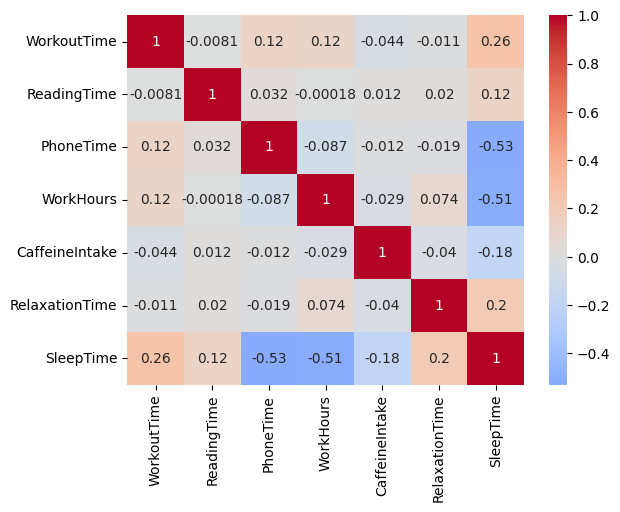

In [11]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", center=0)
mtp.pyplot.show()

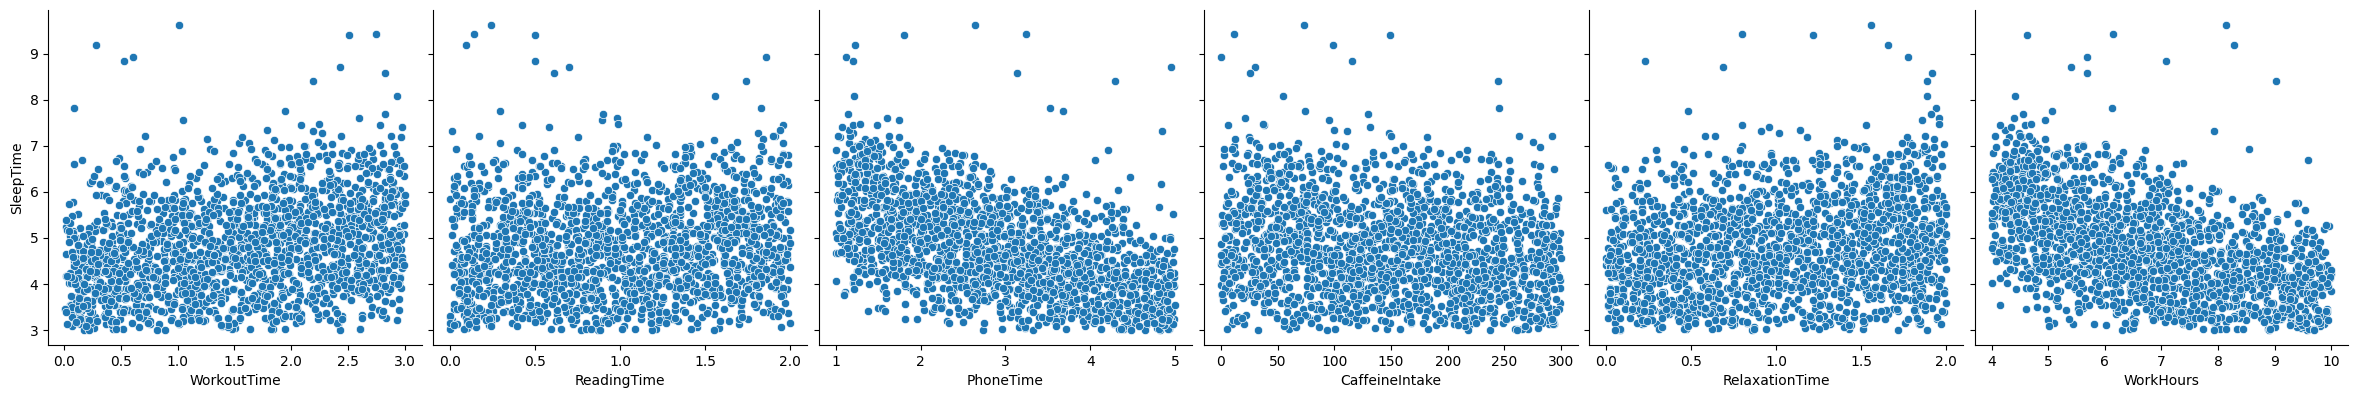

In [12]:
# WorkoutTime	ReadingTime	PhoneTime	WorkHours	CaffeineIntake	RelaxationTime	SleepTime
sns.pairplot(df, x_vars=['WorkoutTime', 'ReadingTime', 'PhoneTime', 'CaffeineIntake', 'RelaxationTime', 'WorkHours'],
                 y_vars=['SleepTime' ], height=4, aspect=1, kind='scatter', diag_kind='kde')

For most of the variables above, it is not possible to identify a clear pattern, but when we look at the variables phone time and work hours, we can observe a trend: the more a person works or spends time on the phone, the higher the probability of having a poor night's sleep.

In [13]:
print("unique count\n", df.nunique())

unique count
 WorkoutTime        300
ReadingTime        201
PhoneTime          389
WorkHours          568
CaffeineIntake    1738
RelaxationTime     201
SleepTime          414
dtype: int64


In [14]:
# WorkoutTime	ReadingTime	PhoneTime	WorkHours	CaffeineIntake	RelaxationTime	SleepTime
# [['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours', 'CaffeineIntake', 'RelaxationTime']]
X = df[['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours', 'CaffeineIntake', 'RelaxationTime']]
# X = df[[ 'PhoneTime', 'WorkHours', ]]
Y = df[['SleepTime']]



In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
x_test_original = x_test.copy()
x_train_original = x_train.copy()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1251, 6) (537, 6) (1251, 1) (537, 1)


In [16]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


Training our model

using RandomForest

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

RF_model=RandomForestRegressor(n_estimators=100, random_state=42)  # Create a Random Forest Regressor RF_model
RF_model = RF_model.fit(x_train,y_train)  # Train /Fit the RF_model with feature and output
RF_y_pred=RF_model.predict(x_test)
print("MAE:", mean_absolute_error(y_test, RF_y_pred))
print("MSE:", mean_squared_error(y_test, RF_y_pred))
print("R^2 Score:", r2_score(y_test, RF_y_pred))
print(x_test.shape , x_train.shape)


c:\Users\25194\Desktop\SleepModel\.venv\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE: 0.2678744878957168
MSE: 0.29253242208566105
R^2 Score: 0.7463833905219133
(537, 6) (1251, 6)


using Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
lr_model= LinearRegression()  
lr_model = lr_model.fit(x_train,y_train)  
lr_y_pred=lr_model.predict(x_test) 
lr_x_pred = lr_model.predict(x_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Scrores on New Data")
print("MAE:", mean_absolute_error(y_test, lr_y_pred))
print("MSE:", mean_squared_error(y_test, lr_y_pred))
print("R^2 Score:", r2_score(y_test, lr_y_pred))
print("Scores on Training Data")
print("MAE:" , mean_absolute_error(y_train,lr_x_pred))
print("MSE:", mean_squared_error(y_train, lr_x_pred))
print("R^2 Score:", r2_score(y_train, lr_x_pred))


Scrores on New Data
MAE: 0.10953828368213617
MSE: 0.23636758668091012
R^2 Score: 0.795076574770313
Scores on Training Data
MAE: 0.07789444616855305
MSE: 0.10683498397654013
R^2 Score: 0.896177079851769


using polynomial regression


In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(x_train)
X_poly_test = poly.transform(x_test)
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)
lr_ploy_y_pred = lr_poly.predict(X_poly_test)


print("MAE:", mean_absolute_error(y_test, lr_ploy_y_pred))
print("MSE:", mean_squared_error(y_test, lr_ploy_y_pred))
print("R^2 Score:", r2_score(y_test, lr_ploy_y_pred))

MAE: 0.11379645084814421
MSE: 0.23442469994844034
R^2 Score: 0.796760997789737


using Decision Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(min_samples_split = 3, max_depth = 6, criterion = 'absolute_error')
decision_tree.fit(x_train, y_train)
dt_y_pred = decision_tree.predict(x_test)

print("MAE:", mean_absolute_error(y_test, dt_y_pred))
print("MSE:", mean_squared_error(y_test, dt_y_pred))
print("R^2 Score:", r2_score(y_test, dt_y_pred))



MAE: 0.4552793296089386
MSE: 0.49982211359404094
R^2 Score: 0.5666696057547691


From the Above two Algorithms used Linear Regression have come across as best one for this set of data

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

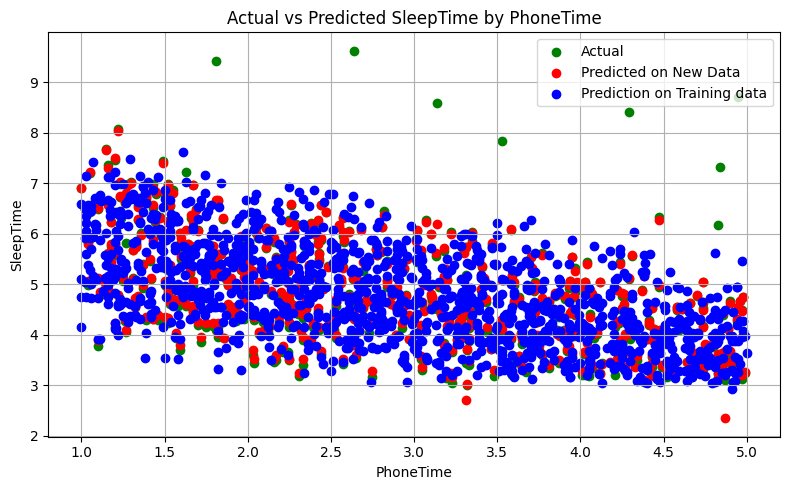

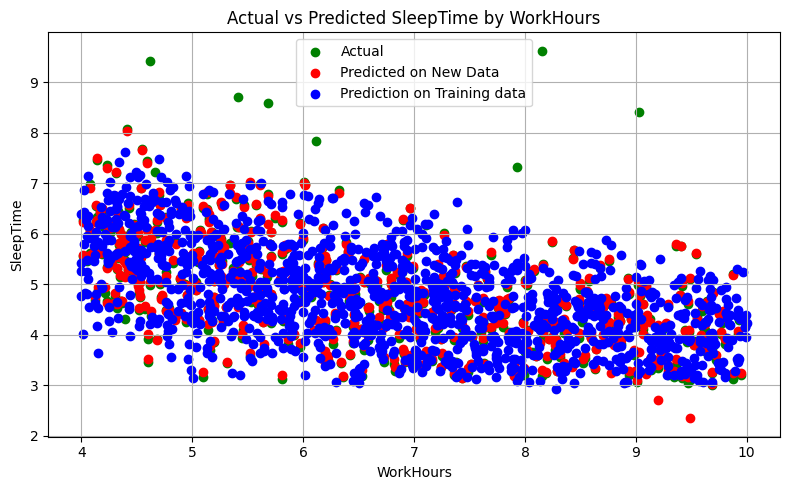

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt

for feature in x_test_original.columns:
    plt.figure(figsize=(8, 5))
    if ( feature == 'WorkHours' or feature == 'PhoneTime'):
        plt.scatter(x_test_original[feature], y_test, label='Actual', color='green')
        plt.scatter(x_test_original[feature], lr_y_pred, label='Predicted on New Data', color='red')
        plt.scatter(x_train_original[feature], lr_x_pred, label='Prediction on Training data', color='blue')
        plt.xlabel(feature)
        plt.ylabel('SleepTime')
        plt.title(f'Actual vs Predicted SleepTime by {feature}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


the above graphs also indicates that prediction are not that much of from actual values so we can say our model is relatively good but needs improvement

In [22]:
def predict_sleep_time(input_data):
    """
    Predicts sleep time given input features.
    
    Parameters:
    - input_data: List or array of shape (1, 6), e.g. [[WorkoutTime, ReadingTime, PhoneTime, WorkHours, CaffeineIntake, RelaxationTime]]
    
    Prints the predicted SleepTime from different models.
    """
    scaled_input = scaler.transform(input_data)
    dt_pred = decision_tree.predict(scaled_input)[0]
    lr_pred = lr_model.predict(scaled_input)[0]
    rf_pred = RF_model.predict(scaled_input)[0]
    poly_pred = lr_poly.predict(poly.transform(scaled_input))[0]
    print(f"Predicted SleepTime on Decision Tree: {dt_pred} hours")
    print(f"Predicted SleepTime on Linear Regression: {lr_pred} hours")
    print(f"Predicted SleepTime on Random Forest: {rf_pred} hours")
    print(f"Predicted SleepTime on Polynomial Regression: {poly_pred} hours")
random_inputs = np.array([[1.12, 1.52, 3.12, 8.52,220.12, 1.52]])
predict_sleep_time(random_inputs)


Predicted SleepTime on Decision Tree: 3.4 hours
Predicted SleepTime on Linear Regression: [3.902915] hours
Predicted SleepTime on Random Forest: 3.7878000000000003 hours
Predicted SleepTime on Polynomial Regression: [3.89121294] hours


c:\Users\25194\Desktop\SleepModel\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Save the model
import joblib
# joblib.dump(decision_tree, 'decision_tree_model.pkl')
# joblib.dump(lr_model, 'linear_regression_model.pkl')
# joblib.dump(RF_model, 'random_forest_model.pkl')
# joblib.dump(lr_poly, 'polynomial_regression_model.pkl')


['polynomial_regression_model.pkl']